In [29]:
#Linear Regression
%pylab inline
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0.4, 1, 2))

Populating the interactive namespace from numpy and matplotlib


In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)

In [112]:
max_d=11
_size=10
x_train = 10*np.random.normal(size=_size)
x_train = np.sort(x_train).reshape(-1,1)
x_expand = np.hstack([x_train**i for i in range(max_d+1)])
#print(x_expand.shape)
x_test = 10*np.random.normal(size=_size)
x_test = np.sort(x_test).reshape(-1,1)

_min=min(x_train[0],x_test[0])
_max=max(x_train[-1],x_test[-1])
x_grid = arange(_min,_max,(_max-_min)/100).reshape(-1,1)

In [103]:
params=np.array([[2,3,-2]])
params.shape

(1, 3)

In [104]:
def predict(x,params):
    d=params.shape[1]
    x_expand = np.hstack([x**i for i in range(d)])
    #print('predict, x_expand.shape=',x_expand.shape,'x.shape=',x.shape,'params.shape=',params.shape)
    answer=np.dot(x_expand,params.transpose())
    return answer

def plotRegression(x_grid,y_f_original,y_f_predicted,x_train,y_train,x_test,y_test):
    plot(x_grid,y_f_estimated,'blue',label='estimated')

    plot(x_grid,y_f_original,'green',label='generator')

    scatter(x_train,y_train,label='training data')

    scatter(x_test,y_test,label='test data')
    legend();

[[ 2.  3. -2.]] [[ 2  3 -2]]
[[-2.41343485  3.15949668 -2.00133505]] [[ 2  3 -2]]
[[55.28435922  2.67518972 -2.24597455]] [[ 2  3 -2]]
[[460.24729396   5.86468852  -5.08966123]] [[ 2  3 -2]]


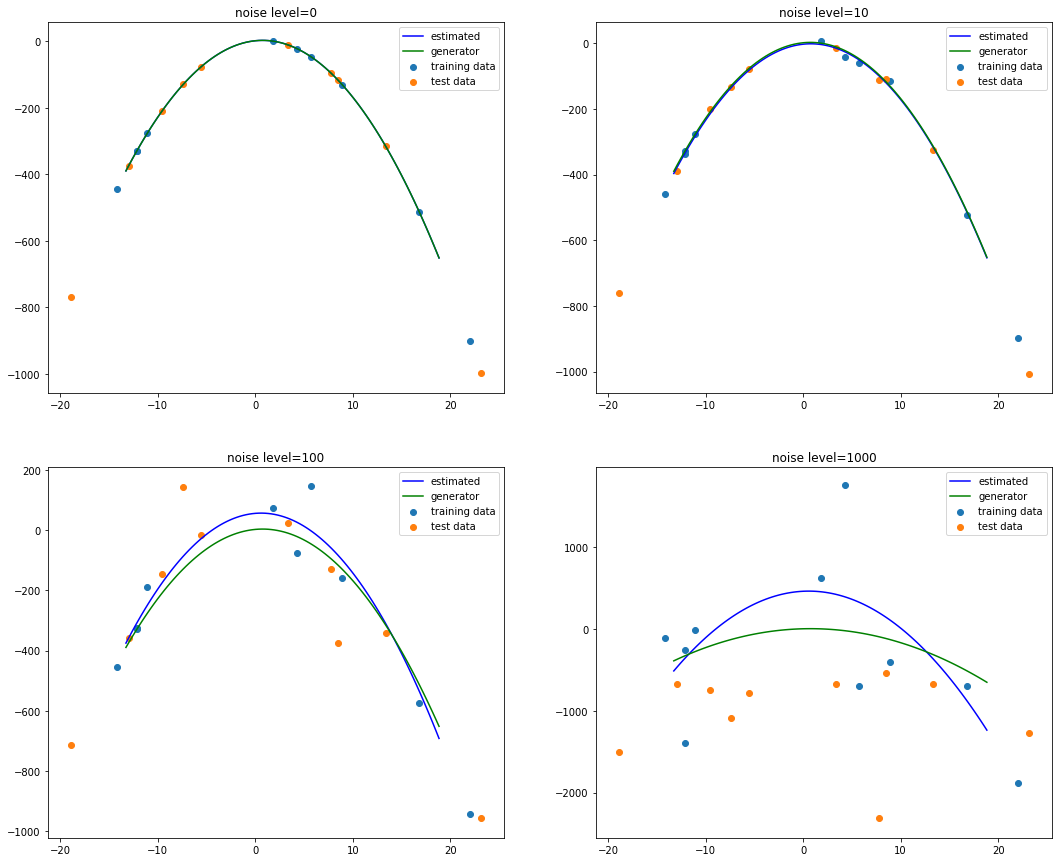

In [131]:
i=1;
figure(figsize=[18,15])
for noise_level in [0,10,100,1000]:
    y_grid = predict(x_grid,params)
    y_train = predict(x_train,params) + noise_level*np.random.normal(size=x_train.shape)
    y_test =  predict(x_test,params) + noise_level*np.random.normal(size=x_test.shape)

    regressor.fit(x_expand[:,:3],y_train)
    coef=regressor.coef_
    print(coef, params)

    y_f_original = predict(x_grid,params)
    y_f_estimated = predict(x_grid,coef)
    subplot(2,2,i)
    i+=1
    plotRegression(x_grid,y_f_original,y_f_estimated,x_train,y_train,x_test,y_test)
    title('noise level=%d'%noise_level)

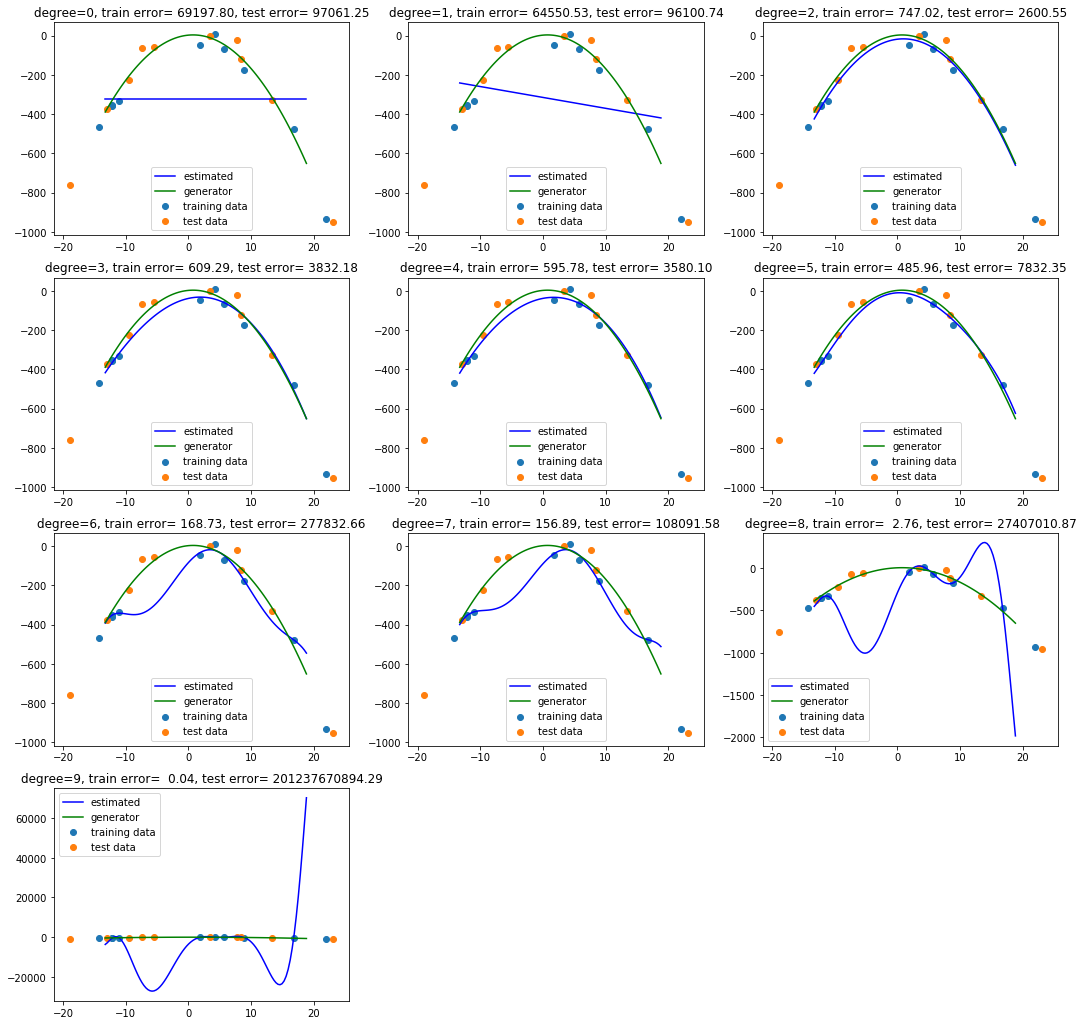

In [116]:
figure(figsize=[18,18])
_d=[]
_test_err=[]
_train_err=[]

y_f_original = predict(x_grid,params)
for d in range(10):
    regressor.fit(x_expand[:,:d+1],y_train)
    
    coef=regressor.coef_
    #print('original params=',params,'\t\testimate params=', coef)

    y_predicted_train = predict(x_train,coef)
    y_predicted_test = predict(x_test,coef)
    train_err = sum((y_predicted_train-y_train)**2)/y_train.shape[0]
    test_err = sum((y_predicted_test-y_test)**2)/y_test.shape[0]
    _test_err.append(test_err)
    _train_err.append(train_err)
    _d.append(d)
    subplot(4,3,d+1)
    y_f_estimated = predict(x_grid,coef)
    plotRegression(x_grid,y_f_original,y_f_estimated,x_train,y_train,x_test,y_test)
    title('degree=%d, train error= %5.2f, test error= %5.2f'%(d,train_err,test_err));
    #subplot(4,3,d+1)
    #figure()
    


Text(0, 0.5, 'MSE')

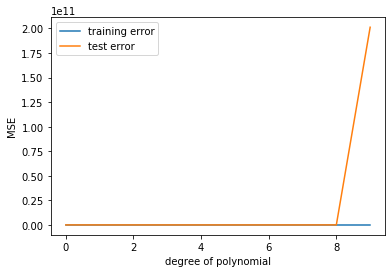

In [117]:
plot(_d,_train_err,label='training error');
plot(_d,_test_err,label='test error');
legend()
xlabel('degree of polynomial')
ylabel('MSE')

Text(0, 0.5, 'MSE')

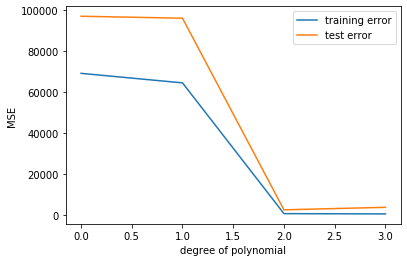

In [118]:
plot(_d[:4],_train_err[:4],label='training error');
plot(_d[:4],_test_err[:4],label='test error');
legend()
xlabel('degree of polynomial')
ylabel('MSE')